## Interpreation of Sound Waves
So a quick introduction about the audio data before we carry on too far. A sound is a vibration of air molecules, and our eardrums interprets it as sound, or music. The below wave plot is a graphical representation of a sound wave vibration overtime. Its in this wave that we need to find the key pattern that will help us distinguish the different emotions.



In [2]:
# plot the audio files like waves
import matplotlib.pyplot as plt
import numpy as np  
import librosa
import librosa.display
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import Audio
import IPython.display as ipd

In [3]:
df=pd.read_csv("../Data/ravdess_complete_df.csv")

In [4]:
df

Emotions                                               Path    Type
0       angry  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
1        fear  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
2        fear  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
3       angry  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
4     disgust  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
...       ...                                                ...     ...
2447     fear  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2448     fear  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2449    angry  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2450      sad  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2451      sad  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song

[2452 rows x 3 columns]

In [5]:
# change the column names to lower case
df.columns = df.columns.str.lower()

In [6]:
df['path']

0       ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...
1       ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...
2       ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...
3       ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...
4       ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...
                              ...                        
2447    ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...
2448    ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...
2449    ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...
2450    ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...
2451    ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...
Name: path, Length: 2452, dtype: object

In [7]:
def play_and_visualize_audio(file_path, figsize=(14, 5)):
    """
    Play an audio sample and visualize its waveform.
    
    Args:
        file_path (str): Path to the audio file
        figsize (tuple): Figure size for the plot
        
    Returns:
        IPython.display.Audio: Audio player widget
    """
    try:
        # Load the audio file with librosa
        y, sr = librosa.load(file_path, sr=None)
        
        # Create a figure with two subplots
        fig, ax = plt.subplots(figsize=figsize)
        
        # Plot waveform
        librosa.display.waveshow(y, sr=sr, ax=ax)
        
        # Add title and labels
        title = os.path.basename(file_path)
        emotion = title.split('-')[2]
        emotions_dict = {
            '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
            '05': 'angry', '06': 'fear', '07': 'disgust', '08': 'surprise'
        }
        emotion_label = emotions_dict.get(emotion, 'unknown')
        
        ax.set_title(f"Waveform: {emotion_label.capitalize()} ({title})")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude")
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
        
        # Return audio player
        print("▶️ Audio Player:")
        return ipd.Audio(data=y, rate=sr)
    
    except FileNotFoundError:
        print(f"Audio file not found: {file_path}")
    except Exception as e:
        print(f"Error processing audio: {str(e)}")
        print(f"File path: {file_path}")


In [8]:

# Example usage
def play_example_emotions(df, num_samples=1):
    """
    Play and visualize sample audio files for each emotion
    
    Args:
        df (pandas.DataFrame): DataFrame with 'path' and 'emotions' columns
        num_samples (int): Number of samples to play per emotion
    """
    for emotion in sorted(df['emotions'].unique()):
        print(f"\n## {emotion.upper()} SAMPLES ##")
        # Get sample files for this emotion
        emotion_files = df[df['emotions'] == emotion]['path'].sample(n=min(num_samples, 
                                                                          sum(df['emotions'] == emotion)))
        
        for file_path in emotion_files:
            display(play_and_visualize_audio(file_path))
 

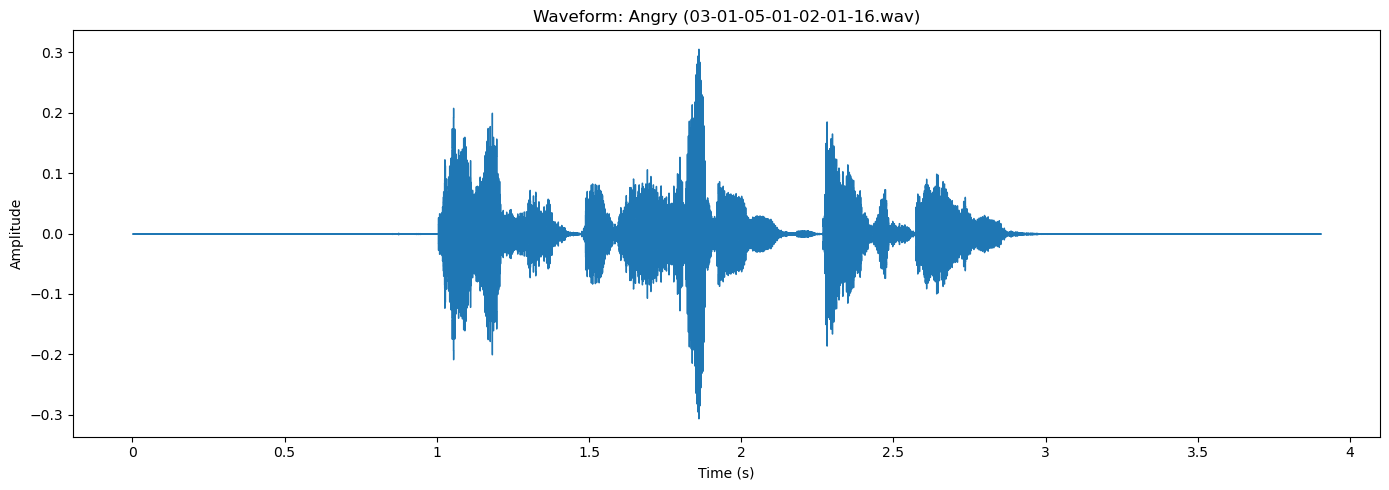

▶️ Audio Player:


In [9]:
           
# Usage:
# 1. Play a specific file
play_and_visualize_audio(df['path'].iloc[0])



## ANGRY SAMPLES ##


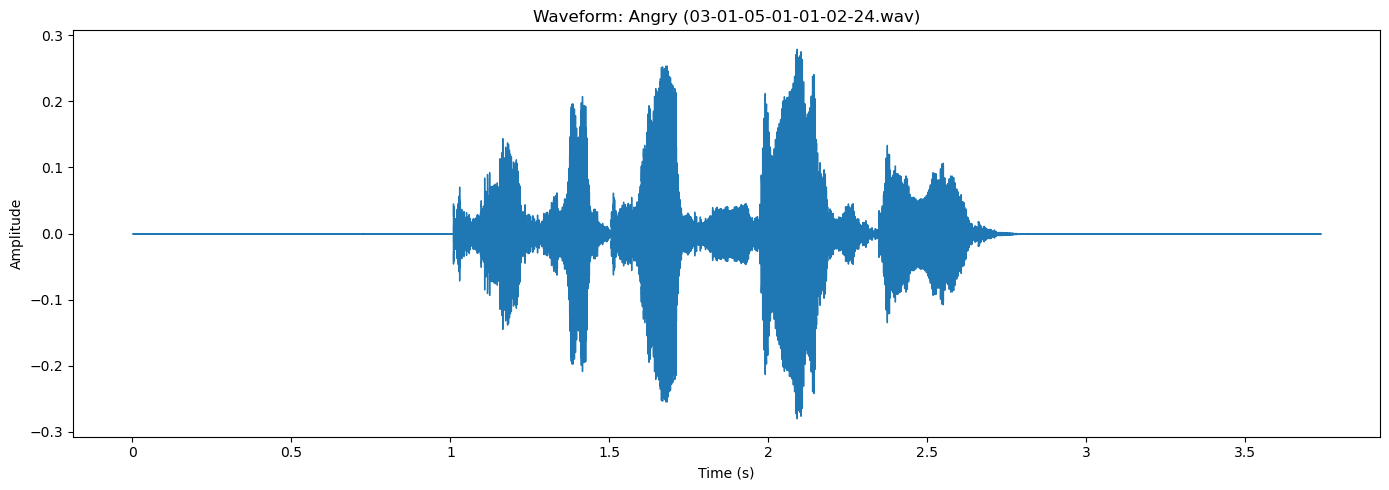

▶️ Audio Player:



## CALM SAMPLES ##


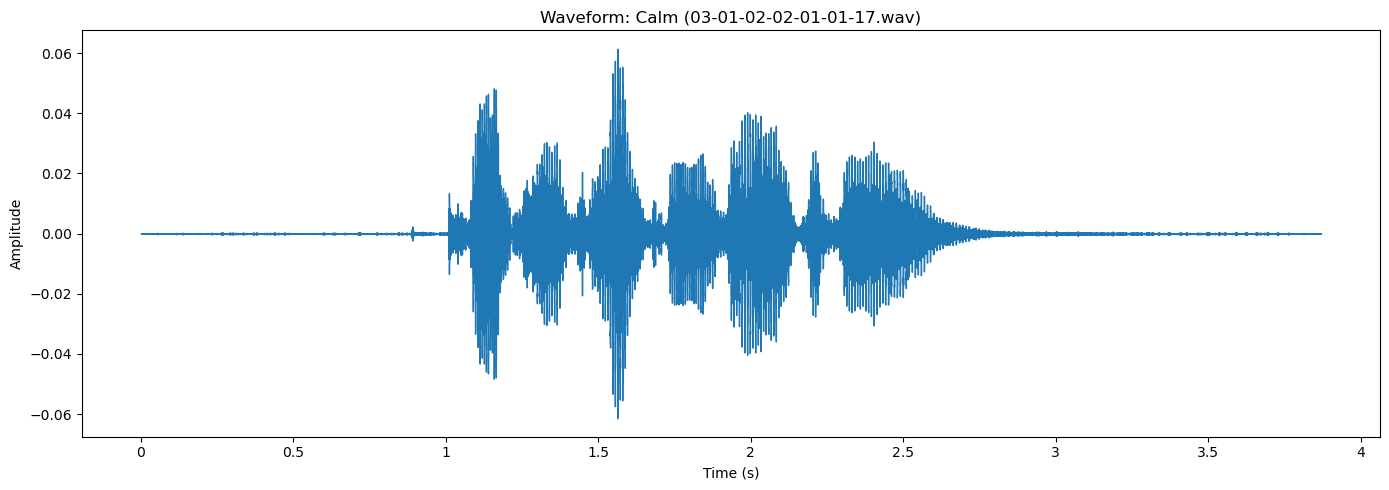

▶️ Audio Player:



## DISGUST SAMPLES ##


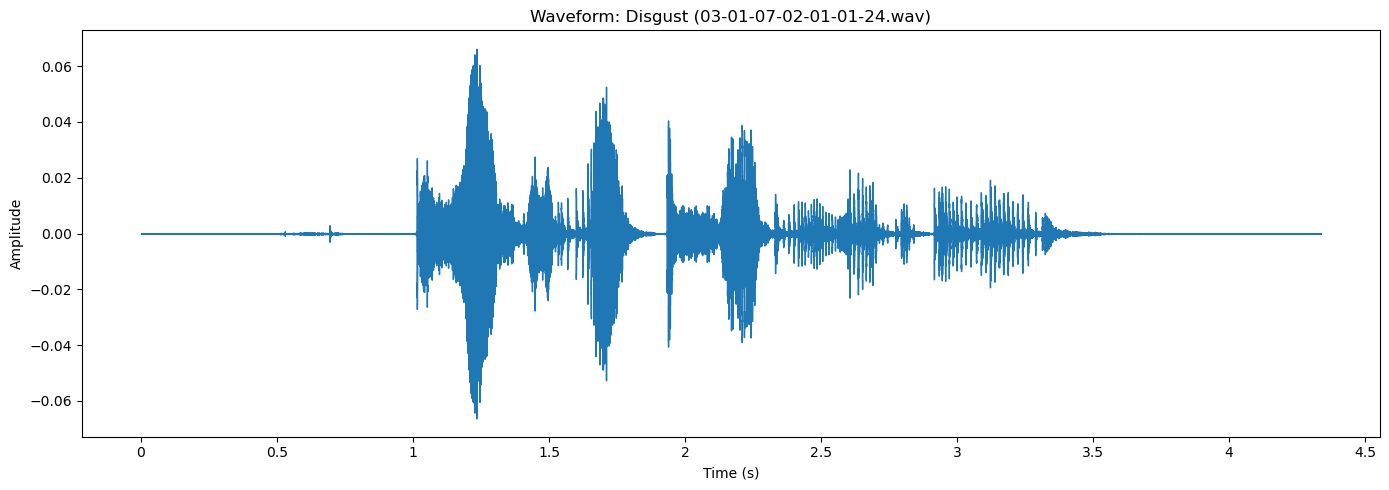

▶️ Audio Player:



## FEAR SAMPLES ##


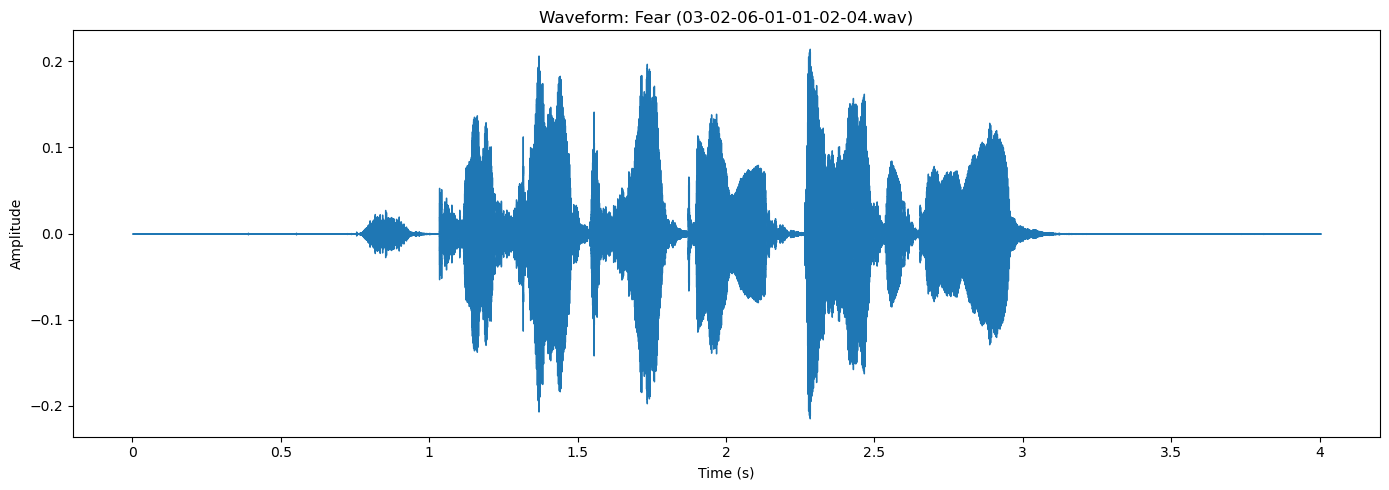

▶️ Audio Player:



## HAPPY SAMPLES ##


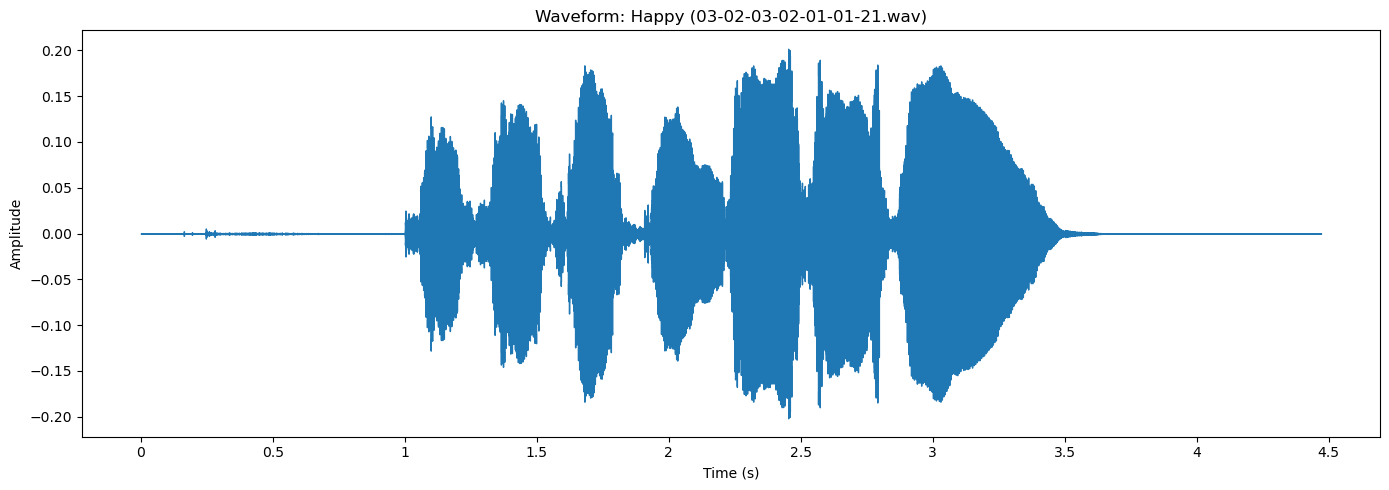

▶️ Audio Player:



## NEUTRAL SAMPLES ##


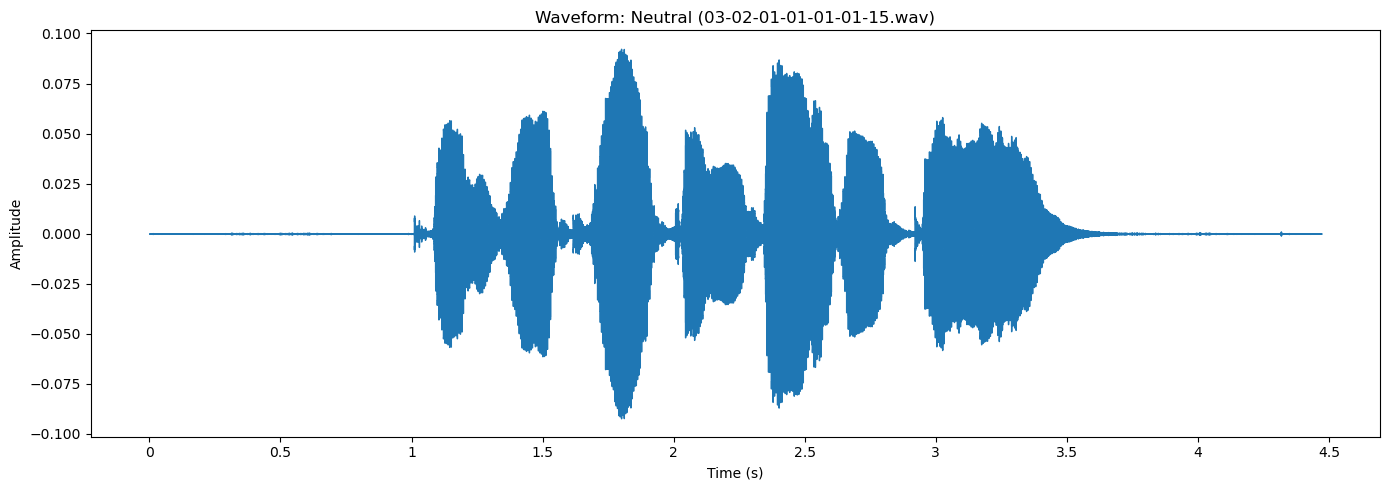

▶️ Audio Player:



## SAD SAMPLES ##


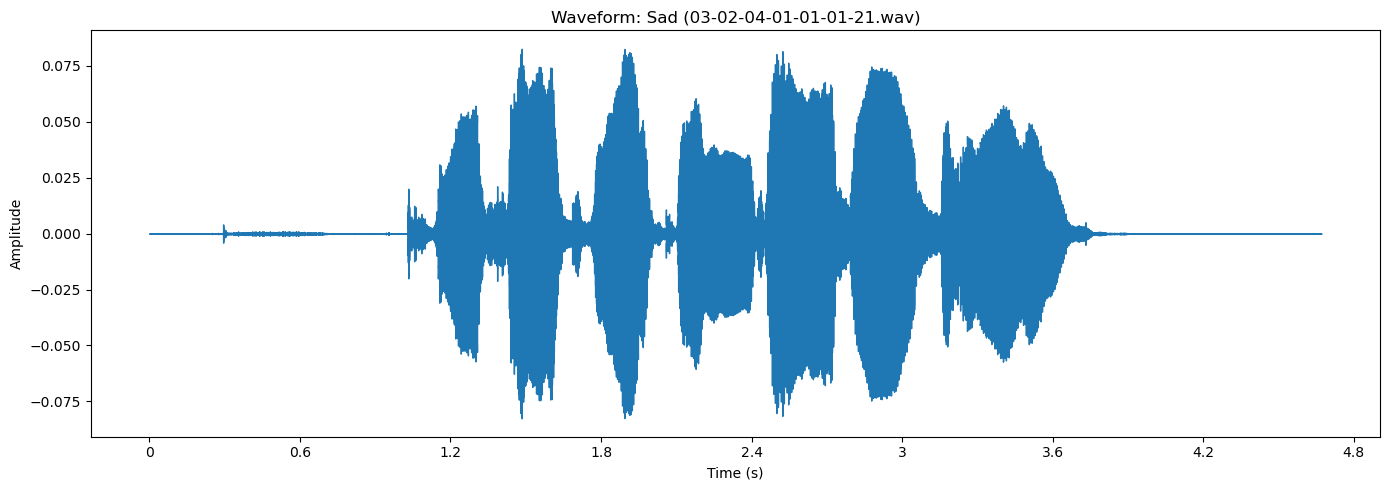

▶️ Audio Player:



## SURPRISE SAMPLES ##


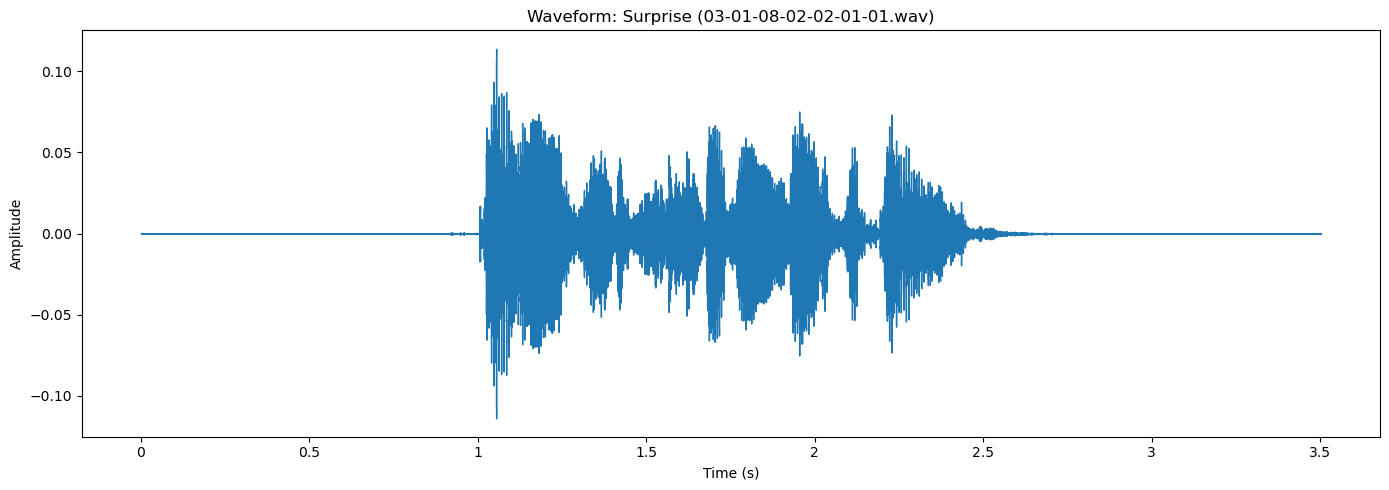

▶️ Audio Player:


In [10]:

# 2. Play examples of each emotion
play_example_emotions(df, num_samples=1)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

# Step 1: First shuffle and stratify split into train+val and test (e.g. 80% train+val, 20% test)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['emotions'],
    random_state=42
)

# Step 2: Further split train+val into train and val (e.g. 75% train, 25% val of the 80%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.25,  # 0.25 x 0.8 = 0.2 final validation size
    stratify=train_val_df['emotions'],
    random_state=42
)

# Optional: Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")


Train size: 1470
Validation size: 491
Test size: 491


In [14]:
train_df.to_csv("../Data/train_df.csv",index=False)
test_df.to_csv("../Data/test_df.csv",index=False)
val_df.to_csv("../Data/val_df.csv",index=False)

In [15]:
df

emotions                                               path    type
0       angry  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
1        fear  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
2        fear  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
3       angry  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
4     disgust  ../Data/Audio_Speech_Actors_01-24/Actor_16/03-...  speech
...       ...                                                ...     ...
2447     fear  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2448     fear  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2449    angry  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2450      sad  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song
2451      sad  ../Data/Audio_Song_Actors_01-24/Actor_08/03-02...    song

[2452 rows x 3 columns]

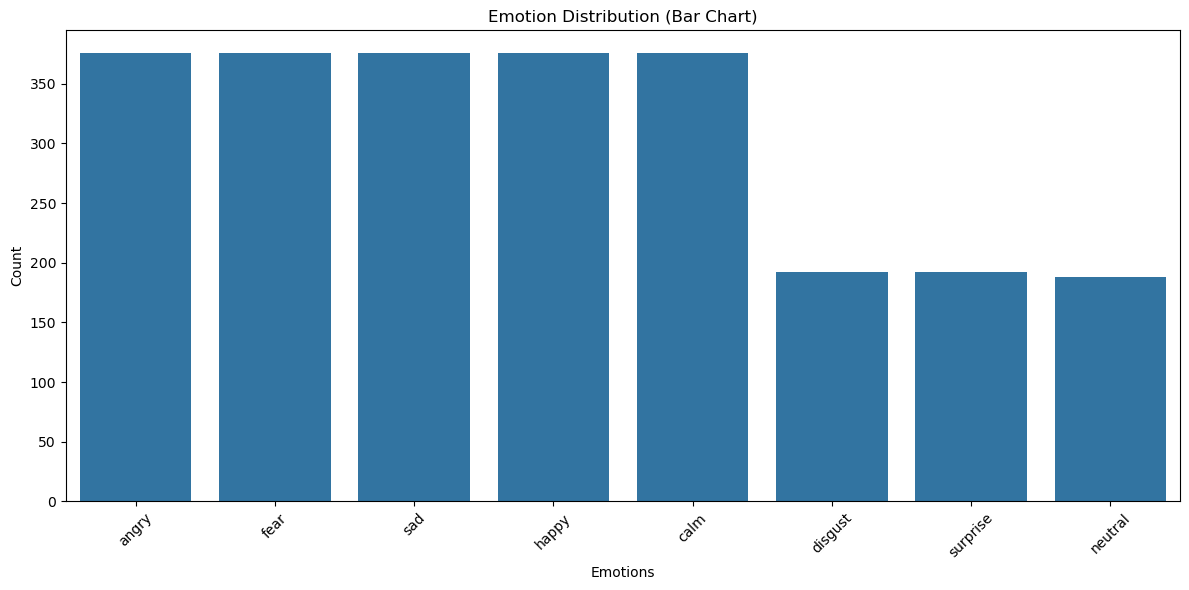

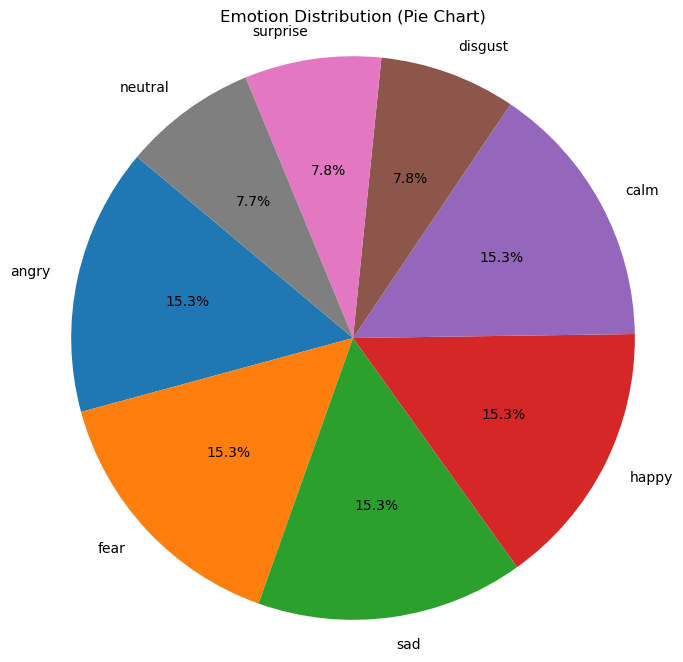

In [16]:
# draw a bar and pie chart of the emotions
def plot_emotion_distribution(df):  
    """
    Plot the distribution of emotions in the DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame with 'emotions' column
    """
    plt.figure(figsize=(12, 6))

    # Bar chart
    sns.countplot(data=df, x='emotions', order=df['emotions'].value_counts().index)
    plt.title('Emotion Distribution (Bar Chart)')
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie chart
    emotion_counts = df['emotions'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Emotion Distribution (Pie Chart)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
# Plot the emotion distribution
plot_emotion_distribution(df)